# MIE451/1513 Decision Support System -- Data Science Solution

## Be sure to let us know:
i. what location you chose (and remember to sign up on Piazza so there are no duplicates),

ii. what preprocessing steps you implemented


# Q1

In [ ]:
import sys
print(sys.version)

!pip install folium
!pip install tqdm
!pip install numpy
!pip install pandas
!pip install nltk
!pip install scikit-learn
!pip install scipy
!pip install geopy
!pip install tabulate
!pip install textblob
!pip install spacy
!python -m spacy download en_core_web_sm


#Plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Data Packages
import math
import pandas as pd
import numpy as np

#Progress bar
from tqdm import tqdm

#Counter
from collections import Counter

#Operation
import operator

#Natural Language Processing Packages
import re
import nltk

## Download Resources
nltk.download("vader_lexicon")
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")

from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.tag import PerceptronTagger
from nltk.data import find

## Machine Learning
import sklearn
import sklearn.metrics as metrics

## Data Visualization
import folium
from tabulate import tabulate
from scipy.stats.kde import gaussian_kde

## Geolocation
import geopy
from geopy.geocoders import Photon
from geopy.extra.rate_limiter import RateLimiter

3.7.13 (default, Mar 16 2022, 17:37:17) 
[GCC 7.5.0]
     |████████████████████████████████| 12.0 MB 23.2 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
# To display all the columns and also to increase the width of each columns to read the reviews
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 500)

In [ ]:
#Read the csv and to convert it into a pandas dataframe 
columnNames = ['filePath','hotelName','reviewColumn','ratingScore','groundTruth',
          'date_stamp','streetAddress', 'City',
          'Province','postalCode']

hoteldf = pd.read_csv('reviews.csv',
                          header=None,
                          names=columnNames)

In [ ]:
# To remove all the hotels having less than 50 reviews as they may skew the analysis 
rev_counts = hoteldf.groupby("hotelName")["hotelName"].transform(len)
mask = (rev_counts > 49) 
hoteldf_mod = hoteldf[mask]

In [ ]:
hoteldf_mod

,filePath,hotelName,reviewColumn,ratingScore,groundTruth,date_stamp,streetAddress,City,Province,postalCode
0,data\ca\154933\10429236\511188397.html,Hotel Zed Kelowna,"""We stayed at the Zed for 4 nights over the Aug long weekend. What a cool place! Loved the roof top patio, a great place to people watch with awesome views. The ping pong room is fun with lots of games....and you can't beat the location, right downtown so you can walk everywhere! Rooms are clean, beds and pillows are fantastic. Staff were so friendly, a big thank you to Evan and Sharon for being so accommodating!! :)) \n",5,positive,"August 11, 2017",1627 Abbott St,"('',)",British Columbia,V1Y 1A9
1,data\ca\154933\10429236\512971178.html,Hotel Zed Kelowna,"""We booked the Batchelor pad, the room was great, however, a little small. It says on the website that it is small so no complaints there, however, with no opening windows it was very stuffy. Great facilities at the complex, pool, sauna etc.",4,positive,"August 14, 2017",1627 Abbott St,"('',)",British Columbia,V1Y 1A9
2,data\ca\154933\10429236\513439299.html,Hotel Zed Kelowna,"""Yes this place is funky, after staying in a lot of hotels I have to says this was a lot of fun. A great place to stay in the middle of the Kelowna hub , the park and the lake outside of your door. And not to mention all the fantastic restaurants so close. One of the best things this place has is the staff right from maintenance and cleaning to the front desk you guys were fantastic",5,positive,"August 15, 2017",1627 Abbott St,"('',)",British Columbia,V1Y 1A9
3,data\ca\154933\10429236\514864289.html,Hotel Zed Kelowna,"""Cute, revamped motel. Great customer service and pleasant staff. They only had two of their parking lots available but assured us that if we couldn't find parking they would cover the cost and even feed a meter for us if we parked on the road. We didn't have a problem with parking but I thought it was great that they offered. Rooms are a little small so I wouldn't suggest a long stay here. Request a room on the top floor as being on the bottom was noisy and we were woken up several times a ...",4,positive,"August 18, 2017",1627 Abbott St,"('',)",British Columbia,V1Y 1A9
4,data\ca\154933\10429236\516485976.html,Hotel Zed Kelowna,"""Great location, downtown with a beautiful park and the lake across the street. Parking is available, nice size rooms , no breakfast but coffee is available in the lobby. Nice and helpful staff . Only negative is the AC , very noisy",4,positive,"August 22, 2017",1627 Abbott St,"('',)",British Columbia,V1Y 1A9
...,...,...,...,...,...,...,...,...,...,...
3575,data\ca\154933\678001\809293654.html,Fairfield Inn &amp; Suites by Marriott Kelowna,"""Always stay in this hotel on our overnight trips to Kelowna. Love that they serve a breakfast. Costco is across the street and there are many restaurants within a short walk. They accommodate a quiet room request. Will be back!",5,positive,"September 10, 2021",1655 Powick Rd,"('',)",British Columbia,V1X 4L1
3576,data\ca\154933\678001\811286033.html,Fairfield Inn &amp; Suites by Marriott Kelowna,"""Excellent mid range hotel friendly staff with great amenities and services. Breakfast .pool, spaces rooms ,HD TV pleasant, outstanding room cleanness ,close to COSTCO and Wal mart . all around. very good for the price highly recommended .Thank you.",5,positive,"September 22, 2021",1655 Powick Rd,"('',)",British Columbia,V1X 4L1
3577,data\ca\154933\678001\811571496.html,Fairfield Inn &amp; Suites by Marriott Kelowna,"""Surrounded by places to eat and shop, the hotel includes everything we needed. As EV owners, we especially appreciated the EV chargers. The place was clean, the breakfasts were good and the staff was available to help if we needed anything.",5,positive,"September 24, 2021",1655 Powick Rd,"('',)",British Columbia,V1X 4L1
3578,data\ca\154933\678001\818277084.html,Fairfield Inn &amp; Suites by Marriott Kelowna,"""We stayed here for two nights while vis

In [ ]:
# Use vader to evaluate the sentiment of reviews
def evalSentences(sentences, to_df=False, columns=[]):
    #Instantiate an instance to access SentimentIntensityAnalyzer class
    sid = SentimentIntensityAnalyzer()
    pdlist = []
    if to_df:
        for sentence in tqdm(sentences):
            # print(f"sent is {sentence}")
            ss = sid.polarity_scores(sentence)
            # print(f"ss is {ss}")
            pdlist.append([sentence]+[ss['compound']])
            # print(f"pd list is {pdlist}")
        reviewDf = pd.DataFrame(pdlist)
        reviewDf.columns = columns
        return reviewDf
    
    else:
        for sentence in tqdm(sentences):
            print('\n',sentence)
            ss = sid.polarity_scores(sentence)
            # print(ss)
            for k in sorted(ss):
                print('{0}: {1}, '.format(k, ss[k]), end='')
            print()

In [ ]:
# To calculate and add the vader score to each of the reviews 
reviews = hoteldf_mod['reviewColumn'].values
reviewsdf = evalSentences(reviews, to_df=True, columns=['reviewColumn','vader'])

100%|██████████| 3201/3201 [00:08<00:00, 367.00it/s]


In [ ]:
# Merging the vader score to the hotel dataframe
finaldf = hoteldf_mod.merge(reviewsdf, on='reviewColumn')

In [ ]:
finaldf

,filePath,hotelName,reviewColumn,ratingScore,groundTruth,date_stamp,streetAddress,City,Province,postalCode,vader
0,data\ca\154933\10429236\511188397.html,Hotel Zed Kelowna,"""We stayed at the Zed for 4 nights over the Aug long weekend. What a cool place! Loved the roof top patio, a great place to people watch with awesome views. The ping pong room is fun with lots of games....and you can't beat the location, right downtown so you can walk everywhere! Rooms are clean, beds and pillows are fantastic. Staff were so friendly, a big thank you to Evan and Sharon for being so accommodating!! :)) \n",5,positive,"August 11, 2017",1627 Abbott St,"('',)",British Columbia,V1Y 1A9,0.9871
1,data\ca\154933\10429236\512971178.html,Hotel Zed Kelowna,"""We booked the Batchelor pad, the room was great, however, a little small. It says on the website that it is small so no complaints there, however, with no opening windows it was very stuffy. Great facilities at the complex, pool, sauna etc.",4,positive,"August 14, 2017",1627 Abbott St,"('',)",British Columbia,V1Y 1A9,0.1944
2,data\ca\154933\10429236\513439299.html,Hotel Zed Kelowna,"""Yes this place is funky, after staying in a lot of hotels I have to says this was a lot of fun. A great place to stay in the middle of the Kelowna hub , the park and the lake outside of your door. And not to mention all the fantastic restaurants so close. One of the best things this place has is the staff right from maintenance and cleaning to the front desk you guys were fantastic",5,positive,"August 15, 2017",1627 Abbott St,"('',)",British Columbia,V1Y 1A9,0.9686
3,data\ca\154933\10429236\514864289.html,Hotel Zed Kelowna,"""Cute, revamped motel. Great customer service and pleasant staff. They only had two of their parking lots available but assured us that if we couldn't find parking they would cover the cost and even feed a meter for us if we parked on the road. We didn't have a problem with parking but I thought it was great that they offered. Rooms are a little small so I wouldn't suggest a long stay here. Request a room on the top floor as being on the bottom was noisy and we were woken up several times a ...",4,positive,"August 18, 2017",1627 Abbott St,"('',)",British Columbia,V1Y 1A9,0.9719
4,data\ca\154933\10429236\516485976.html,Hotel Zed Kelowna,"""Great location, downtown with a beautiful park and the lake across the street. Parking is available, nice size rooms , no breakfast but coffee is available in the lobby. Nice and helpful staff . Only negative is the AC , very noisy",4,positive,"August 22, 2017",1627 Abbott St,"('',)",British Columbia,V1Y 1A9,0.6497
...,...,...,...,...,...,...,...,...,...,...,...
3196,data\ca\154933\678001\809293654.html,Fairfield Inn &amp; Suites by Marriott Kelowna,"""Always stay in this hotel on our overnight trips to Kelowna. Love that they serve a breakfast. Costco is across the street and there are many restaurants within a short walk. They accommodate a quiet room request. Will be back!",5,positive,"September 10, 2021",1655 Powick Rd,"('',)",British Columbia,V1X 4L1,0.6696
3197,data\ca\154933\678001\811286033.html,Fairfield Inn &amp; Suites by Marriott Kelowna,"""Excellent mid range hotel friendly staff with great amenities and services. Breakfast .pool, spaces rooms ,HD TV pleasant, outstanding room cleanness ,close to COSTCO and Wal mart . all around. very good for the price highly recommended .Thank you.",5,positive,"September 22, 2021",1655 Powick Rd,"('',)",British Columbia,V1X 4L1,0.9785
3198,data\ca\154933\678001\811571496.html,Fairfield Inn &amp; Suites by Marriott Kelowna,"""Surrounded by places to eat and shop, the hotel includes everything we needed. As EV owners, we especially appreciated the EV chargers. The place was clean, the breakfasts were good and the staff was available to help if we needed anything.",5,positive,"September 24, 2021",1655 Powick Rd,"('',)",British Columbia,V1X 4L1,0.8977
3199,data\ca\154933\678001\818277084.html,Fairfield Inn &amp; Sui

In [ ]:
#Extracting the list of hotels in the dataframe
hotelNames = finaldf['hotelName'].unique()
print(len(hotelNames))
print(hotelNames)

35
['Hotel Zed Kelowna' 'Playa del Sol Resort'
 'Holiday Inn Express &amp; Suites Kelowna - East, an IHG hotel'
 'The Royal Kelowna - Bellstar Hotels &amp; Resorts'
 'Comfort Suites Kelowna' 'A Vacation Paradise at Quail Ridge B &amp; B'
 'Myra Canyon Ranch' 'A Touch of English Bed &amp; Breakfast'
 'Kanata Kelowna Hotel and Conference Centre'
 'Best Western Plus Kelowna Hotel &amp; Suites'
 'Econo Lodge Inn &amp; Suites Kelowna' 'Coast Capri Hotel'
 'Days Inn by Wyndham Kelowna' 'Siesta Suites' 'Accent Inn Kelowna'
 'The Royal Anne Hotel' 'Sandman Hotel &amp; Suites Kelowna'
 'Eldorado Resort - Hotel Eldorado' 'Lake Okanagan Resort'
 'Delta Hotels by Marriott Grand Okanagan Resort' 'Samesun Kelowna'
 'Prestige Beach House, BW Premier Collection'
 'Ramada by Wyndham Kelowna Hotel &amp; Conference Center'
 'Super 8 by Wyndham Kelowna BC'
 'Hampton Inn &amp; Suites by Hilton Kelowna Airport'
 'Hyatt Place Kelowna' 'Manteo at Eldorado Resort'
 'Four Points by Sheraton Kelowna Airport' 'Ho

**Q1(a) Compute average Vader sentiment and average ground truth rating per hotel.**

In [ ]:
# Calculating the average score of the ground truth rating and vader score 
def avg_rating_per_hotel(df):
  tempDf = df[['hotelName','vader','ratingScore','reviewColumn']]
  tempDf.columns = ['hotelName','AverageVader', 'AverageRatingScore','n_reviews']
  tempDf = tempDf.groupby('hotelName').agg({'AverageVader':'mean', 'AverageRatingScore':'mean','n_reviews':'count'})
  return tempDf

In [ ]:
# Calculating the average score of the ground truth rating & vader score 
avg_rating_df = avg_rating_per_hotel(finaldf)

In [ ]:
avg_rating_df

,AverageVader,AverageRatingScore,n_reviews
hotelName,,,
A Touch of English Bed &amp; Breakfast,0.955603,4.950000,100
A Vacation Paradise at Quail Ridge B &amp; B,0.956135,4.863636,66
A Vista Villa Couples Retreat,0.957413,4.940000,100
Accent Inn Kelowna,0.735331,4.290000,100
Best Western Plus Kelowna Hotel &amp; Suites,0.831749,4.240000,100
Coast Capri Hotel,0.869402,4.660000,100
Comfort Suites Kelowna,0.772471,4.300000,100
Days Inn by Wyndham Kelowna,0.568268,3.350000,100
Delta Hotels by Marriott Grand Okanagan Resort,0.696498,3.780000,100


**Q1 (b) Rank hotels by**

**(i) Average Ground Truth Sentiment**

**(ii) Average Vader Compound Sentiment Score**

**Show both top-5 and bottom-5 for both ranking methods. Do they agree? If not discuss any differences.**

In [ ]:
# Displaying the top 5 hotels based on average groundtruth score
avgRatingTop5 = avg_rating_df.reset_index(drop=False)\
                               .sort_values('AverageRatingScore',ascending=False)[['hotelName','AverageRatingScore','n_reviews']].head(5)
avgRatingTop5

,hotelName,AverageRatingScore,n_reviews
21,Lakeshore Bed &amp; Breakfast,4.970000,100
0,A Touch of English Bed &amp; Breakfast,4.950000,100
2,A Vista Villa Couples Retreat,4.940000,100
23,Myra Canyon Ranch,4.910000,100
1,A Vacation Paradise at Quail Ridge B &amp; B,4.863636,66


In [ ]:
# Displaying the botttom 5 hotels based on average groundtruth score
avgRatingBottom5 = avg_rating_df.reset_index(drop=False)\
                               .sort_values('AverageRatingScore',ascending=True)[['hotelName','AverageRatingScore','n_reviews']].head(5)
avgRatingBottom5

,hotelName,AverageRatingScore,n_reviews
20,Lake Okanagan Resort,2.210000,100
24,Oasis Inn,2.866667,60
32,The Recreation Inn &amp; Suites,3.328767,73
7,Days Inn by Wyndham Kelowna,3.350000,100
27,Ramada by Wyndham Kelowna Hotel &amp; Conference Center,3.420000,100


In [ ]:
# Displaying the top 5 hotels based on average vader score
avgVaderTop5 = avg_rating_df.reset_index(drop=False)\
                              .sort_values('AverageVader',ascending=False)[['hotelName','AverageVader','n_reviews']].head(5)
avgVaderTop5

,hotelName,AverageVader,n_reviews
2,A Vista Villa Couples Retreat,0.957413,100
1,A Vacation Paradise at Quail Ridge B &amp; B,0.956135,66
21,Lakeshore Bed &amp; Breakfast,0.955875,100
0,A Touch of English Bed &amp; Breakfast,0.955603,100
23,Myra Canyon Ranch,0.947746,100


In [ ]:
# Displaying the bottom 5 hotels based on average vader score
avgVaderBottom5 = avg_rating_df.reset_index(drop=False)\
                              .sort_values('AverageVader',ascending=True)[['hotelName','AverageVader','n_reviews']].head(5)
avgVaderBottom5

,hotelName,AverageVader,n_reviews
20,Lake Okanagan Resort,0.184718,100
24,Oasis Inn,0.364918,60
29,Sandman Hotel &amp; Suites Kelowna,0.434081,100
32,The Recreation Inn &amp; Suites,0.522381,73
31,Super 8 by Wyndham Kelowna BC,0.561133,100


In [ ]:
# Comparing the top 5 hotels based on avg. rating vs avg. vader score
print('Top 5 hotels avg rating vs. avg vader score:')

table = [[i,x,avgVaderTop5['hotelName'].iloc[i]] for i, x in enumerate(avgRatingTop5['hotelName'])]
headers = ["Rank", "avg Rating", "avg Vader"]

print(tabulate(table, headers, tablefmt="grid"))

Top 5 hotels avg rating vs. avg vader score:
+--------+----------------------------------------------+----------------------------------------------+
|   Rank | avg Rating                                   | avg Vader                                    |
+========+==============================================+==============================================+
|      0 | Lakeshore Bed &amp; Breakfast                | A Vista Villa Couples Retreat                |
+--------+----------------------------------------------+----------------------------------------------+
|      1 | A Touch of English Bed &amp; Breakfast       | A Vacation Paradise at Quail Ridge B &amp; B |
+--------+----------------------------------------------+----------------------------------------------+
|      2 | A Vista Villa Couples Retreat                | Lakeshore Bed &amp; Breakfast                |
+--------+----------------------------------------------+----------------------------------------------+
|      3 |

In [ ]:
# Comparing the bottom 5 hotels based on avg. rating vs avg. vader score
print('Bottom 5 hotels avg rating vs. avg vader score:')

table = [[i,x,avgVaderBottom5['hotelName'].iloc[i]] for i, x in enumerate(avgRatingBottom5['hotelName'])]
headers = ["Rank", "avg Rating", "avg Vader"]

print(tabulate(table, headers, tablefmt="grid"))

Bottom 5 hotels avg rating vs. avg vader score:
+--------+---------------------------------------------------------+------------------------------------+
|   Rank | avg Rating                                              | avg Vader                          |
+========+=========================================================+====================================+
|      0 | Lake Okanagan Resort                                    | Lake Okanagan Resort               |
+--------+---------------------------------------------------------+------------------------------------+
|      1 | Oasis Inn                                               | Oasis Inn                          |
+--------+---------------------------------------------------------+------------------------------------+
|      2 | The Recreation Inn &amp; Suites                         | Sandman Hotel &amp; Suites Kelowna |
+--------+---------------------------------------------------------+------------------------------------

The **top 5 hotels** ranked using average ground truth rating and average vader score **completely agree with eachother**. Whereas, for the **bottom 5 hotels only 3/5 hotels are same.** 

The reason there is a difference could be because some of the **low rated hotels the users may have given a neutral review instead of a bad review **this could have skewed the vader score. Similarly for **higher rated hotel the customers may have been harsher with their reviews** and the vader score may have been lower eventhough they gave a high score. 

# Q2

**Q2 a) Use term frequency of the words for (i) positive reviews and (ii) negative with ground truth sentiment to rank the top-50 most frequent non-stopwords in the review collection. Which words appear to be location specific? What words appear in both positive and negative reviews? Do any words that appear in both lists surprise you?**

In [ ]:
# To get a Stopwords list function
def get_stop_words():
    if type(stopwords) == list:
        stop = stopwords
        #Add possible Stop Words for Hotel Reviews
        stop.append('hotel')
        stop.append('room')
        stop.append('rooms')
        stop.append('stay')
        stop.append('staff')
    else:
        stop = set(stopwords.words('english'))
        #Add possible Stop Words for Hotel Reviews
        stop.add('hotel')
        stop.add('room')
        stop.add('rooms')
        stop.add('stay')
        stop.add('staff')
    return stop

# To get the most common words used for positive and negative reviews
def getTopKWords(df, kwords, label=None):

    stop = get_stop_words()
    counter = Counter()

    if label != None:
      filt = hoteldf_mod['groundTruth'] == label
        
      for review in hoteldf_mod[filt]['reviewColumn']:
              counter.update([word.lower() 
                              for word 
                              in re.findall(r'\w+', review) 
                              if word.lower() not in stop and len(word) > 2])
    else:
      reviews = df['reviewColumn'].values
      for review in reviews:
              counter.update([word.lower() 
                              for word 
                              in re.findall(r'\w+', review) 
                              if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(kwords)
    return topk

In [ ]:
# Calculate the top 50 words from positive and negative reviews 
topk_pos = getTopKWords(df=hoteldf_mod, kwords=50, label='positive')
topk_neg = getTopKWords(df=hoteldf_mod, kwords=50, label='negative')

In [ ]:
# Displaying the top 50 words from positive words
topk_pos = pd.DataFrame(topk_pos,columns=['Positive Words','Counts'])
topk_pos

,Positive Words,Counts
0,great,1350
1,clean,1166
2,breakfast,1025
3,kelowna,925
4,nice,780
5,good,779
6,friendly,778
7,would,751
8,pool,692
9,stayed,663


In [ ]:
# Displaying the top 50 words from negative words
topk_neg = pd.DataFrame(topk_neg,columns=['Negative Words','Counts'])
topk_neg

,Negative Words,Counts
0,would,381
1,night,332
2,one,324
3,clean,312
4,good,257
5,front,249
6,breakfast,248
7,stayed,247
8,desk,246
9,place,246


1. The location specific words that appear in both positive & negative is Kelowna, parking, and pool. 

2. Some of the words that appear in both sentiments are good, front, great, breakfast and parking. This makes sense as these words on their own doesn't mean anything they are vague but it could used as both positive and negative sentiments.
 
 **For example:** with a **'not'** infront it could easily be negative. So its not surprising to see these words.

**Q2 (b) Repeat this analysis for the top-50 noun phrases (using the provided grammar pattern below)**.
**Do any noun phrases appear in both positive and negative reviews? Identify a noun phrase you did not expect to see in the positive reviews and explain why it may be there.**



In [ ]:
# This grammar is described in the paper by S. N. Kim,
# T. Baldwin, and M.-Y. Kan.
# Evaluating n-gram based evaluation metrics for automatic
# keyphrase extraction.
# Technical report, University of Melbourne, Melbourne 2010.
grammar = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns
        
    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
"""
# Defining a grammar for a phrase pattern 
grammar2 = r"""
    NBAR:
    {<NN.*|RB>*<NN.*>}  # Nouns and Addverb, terminated with Nouns

    VP:
    {<V.*|JJ>*<V.*>}  #  Adjectives and Verb, terminated with Verbs
    NP:
    {<NBAR>}
    {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
"""

In [ ]:
tagger = PerceptronTagger()
# Part of Speech Tagging
pos_tag = tagger.tag
# Create phrase tree for both grammar 
chunker = nltk.RegexpParser(grammar)
chunker2 = nltk.RegexpParser(grammar2)

In [ ]:
# to make the results more useable, we clean up the tree results shown above. 
lemmatizer = nltk.WordNetLemmatizer()
stemmer = nltk.stem.porter.PorterStemmer()
stopword_list = get_stop_words()

# generator, generate leaves one by one
def leaves(tree):
    """Finds NP (nounphrase) leaf nodes of a chunk tree."""
    for subtree in tree.subtrees(filter = lambda t: t.label()=='NP' or t.label()=='JJ' or t.label()=='RB'):
        yield subtree.leaves()

# stemming, lematizing, lower case... 
def normalise(word,lemmatizer=lemmatizer, stemmer=stemmer):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    word = stemmer.stem(word)
    word = lemmatizer.lemmatize(word)
    return word

# stop-words and length control
def acceptable_word(word, stopword_list=stopword_list):
    """Checks conditions for acceptable word: length, stopword."""
    accepted = bool(2 <= len(word) <= 40
        and word.lower() not in stopword_list)
    return accepted


# generator, create item one a time
def get_terms(tree):
    for leaf in leaves(tree):
      
        term = [normalise(w) for w,t in leaf if acceptable_word(w) ]
        # Phrase only
        if len(term)>1:
            yield term


# Flatten phrase lists to get tokens for analysis
def flatten_phrase_lists(npTokenList):
    finalList =[]
    for phrase in npTokenList:
        token = ''
        for word in phrase:
            token += word + ' '
        finalList.append(token.rstrip())
    return finalList

In [ ]:
#Function to get the phrases using the chunker from both the positive and negative reviews
def getTopk_phrase(df, k, label=None, chunker=None):
    # Top-k frequent terms
    counter = Counter()

    if label != None:
      filt = hoteldf_mod['groundTruth'] == label
      for review in hoteldf_mod[filt]['reviewColumn']:
        taggedToks = pos_tag(re.findall(r'\w+', review))
        tree = chunker.parse(taggedToks)
        counter.update(flatten_phrase_lists([word for word in get_terms(tree)]))
    
    else:
      # print("no label")
      reviews = df['reviewColumn'].values
      for review in reviews:
        taggedToks = pos_tag(re.findall(r'\w+', review))
        tree = chunker.parse(taggedToks)
        counter.update(flatten_phrase_lists([word for word in get_terms(tree)]))    

    topk = counter.most_common(k) 
    return topk

In [ ]:
# To get the phrases using the chunker from both the positive and negative reviews
topkPhrasePos1 = getTopk_phrase(hoteldf_mod, k=50, label="positive", chunker= chunker)
topkPhraseNeg1 = getTopk_phrase(hoteldf_mod, k=50, label="negative", chunker= chunker)

In [ ]:
topkPhrasePos1 = pd.DataFrame(topkPhrasePos1,columns=['Positive Phrases','Counts']) 
topkPhrasePos1

,Positive Phrases,Counts
0,front desk,183
1,hot tub,129
2,great place,56
3,great locat,52
4,continent breakfast,47
5,next time,39
6,pool area,37
7,vista villa,34
8,great experi,32
9,comfort bed,32


In [ ]:
topkPhraseNeg1 = pd.DataFrame(topkPhraseNeg1,columns=['Negative Phrases','Counts'])
topkPhraseNeg1

,Negative Phrases,Counts
0,front desk,137
1,credit card,29
2,park lot,26
3,hot tub,24
4,first time,18
5,next day,18
6,first night,17
7,air condition,15
8,great locat,14
9,long time,14


1. Front desk, free breakfast, parking lot and hot tub are some of the words that are common in both sentiments. Like before they can be easily used in a negative and positive sense.

2. The word that I didn't expect to see in the positive sentiment is that most of the positive reviews are talking about the location like view, kelowna area, perfect location, and water slide.

**Q2 (c) Define a grammar for a phrase pattern (different from the one already provided) that you think would be helpful for review analysis. Note at least 3 observations on the similarities or differences between these noun phrases and those in Q2(b). Which pattern do you think is more effective for sentiment analysis and why?**


In [ ]:
# To get the phrases using the chunker2 from both the positive and negative reviews
topkPhrasePos = getTopk_phrase(hoteldf_mod, k=50, label="positive", chunker= chunker2)
topkPhraseNeg = getTopk_phrase(hoteldf_mod, k=50, label="negative", chunker= chunker2)

In [ ]:
topkPhrasePos = pd.DataFrame(topkPhrasePos,columns=['Positive Phrases','Counts']) 
topkPhrasePos

,Positive Phrases,Counts
0,front desk,173
1,pool area,43
2,vista villa,38
3,golf cours,32
4,royal ann,30
5,park lot,28
6,great locat,28
7,myra canyon ranch,28
8,groceri store,27
9,custom servic,25


In [ ]:
topkPhraseNeg = pd.DataFrame(topkPhraseNeg,columns=['Negative Phrases','Counts'])
topkPhraseNeg

,Negative Phrases,Counts
0,front desk,125
1,credit card,32
2,park lot,30
3,custom servic,18
4,air condition,16
5,coffe maker,15
6,golf cours,15
7,pool area,12
8,air condit,9
9,breakfast area,9


Defined a new grammar using noun and adverb instead of adjectives and also used verd and adjective. 

This grammar is better than the previous one as I got better noun phrases for positive sentiments like 'customer service' etc and unlike before didn't get phrases like 'next time' and 'next morn'. Likewise for negative sentiments also had a lot more better phrases and phrases like 'next morn' were removed.

# Q3

**Q3 (a) Use mutual information (MI) with ground truth sentiment to rank the top-50 most sentimentbearing non-stopwords in the review collection. Which words get the highest MI values? Does this make sense?**

In [ ]:
# Function to create a bow dataframe to indicate if the top 50 words exist in the review
def dataFrameTransformation(hotelDf, reviewDF, topk):
    reviews = reviewDF['reviewColumn'].values
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter([word.lower() for word in re.findall(r'\w+',reviews[i])])
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        

    freqReviewDf = pd.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','ratingScore','groundTruth']].join(finalreviewDf)
    return finaldf

In [ ]:
# To reset the index of the hotel dataframe 
hoteldf_mod.reset_index(inplace=True)
hoteldf_mod.drop(columns=['index'],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# Getting the top 50 words and creating the binary bow dataframe  
topk = getTopKWords(reviewsdf, 500)
finaldf = dataFrameTransformation(hoteldf_mod, reviewsdf, topk)

In [ ]:
# get Top K mutual information terms from the dataframe
def getMI(topk, df, label_column='groundTruth'):
    miScore = []
    for word in topk:
        miScore.append([word[0]]+[metrics.mutual_info_score(df[label_column], df[word[0]])])
    miScoredf = pd.DataFrame(miScore).sort_values(1,ascending=0)
    miScoredf.columns = ['Word','MI Score']
    return miScoredf

In [ ]:
# Calculating the MI score 
mi_scoredf = getMI(topk, finaldf)

In [ ]:
# Displaying the top 50 words based on the MI score 
mi_scoredf.head(50)

,Word,MI Score
209,dirty,0.034606
175,said,0.023691
0,great,0.023606
127,old,0.019776
157,told,0.018701
122,hosts,0.016530
101,never,0.016388
198,called,0.015765
52,amazing,0.015720
8,friendly,0.014049


The highest MI words makes sense as they are dirty, said, told and hosts these are common words people would use to complain in a reviews.
  

**Q3 (b) Repeat this analysis for the top-50 noun phrases using the grammar you found most effective in Q2. Which noun phrases get the highest MI values? Based on these results what would you recommend the hotels in your city might need to improve?**


In [ ]:
# Note: You may want to use an NLTK tokenizer instead of a regular expression in the following
def dataFrameTransformation_phrases(hotelDf, reviewDF, topk,chunker):
    reviews = reviewDF['reviewColumn'].values
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        taggedToks = pos_tag(re.findall(r'\w+', reviews[i]))
        tree = chunker.parse(taggedToks)
        tempcounter = Counter(flatten_phrase_lists([word for word in get_terms(tree)]))

        topkinReview = [1 if tempcounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    # print(f"freqReview {freqReview[0]}")
    freqReviewDf = pd.DataFrame(freqReview)
    # print(freqReviewDf)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','ratingScore','groundTruth']].join(finalreviewDf)
    # print(dfName)
    return finaldf

In [ ]:
topk_phrases = getTopk_phrase(reviewsdf, 500,chunker=chunker2)
finaldf_phrases = dataFrameTransformation_phrases(hoteldf_mod, reviewsdf, topk_phrases,chunker2)

In [ ]:
miscore_phrasesdf = getMI(topk_phrases, finaldf_phrases)
miscore_phrasesdf.head(50)

,Word,MI Score
7,credit card,0.006174
0,front desk,0.003401
18,air condition,0.003095
1,park lot,0.002901
6,vista villa,0.002726
12,myra canyon ranch,0.002178
76,shower curtain,0.002177
72,patio door,0.001788
188,star motel,0.001729
270,tiki bar,0.001729


Looking at the noun phrases the top words based on MI score are credit card, front desk, parking and air condition this indicates that the hotels should focus on hiring excelent receptionist and make sure they accept credit cards, have space for parking and that the air conditioner is working in all their rooms.  

# Q4

**Q4 (a) For ground truth sentiment, calculate the top-50 words according to Pointwise Mutual Information (PMI) of the word occurring with (i) positive reviews and (ii) negative reviews. Discuss at least 3 interesting and/or locale-specific findings about these top-ranked words.**

In [ ]:
# Simple example of getting pointwise mutual information of a term

def demo_pmiCal(df,word):
    pmilist=[]
    N = df.shape[0]
    for sentiment in ['positive','negative']:
        for word_present in [False,True]:
            px = sum(df['groundTruth']==sentiment)
            py = sum(df[word]==word_present)
            pxy = len(df[(df['groundTruth']==sentiment) & (df[word]==word_present)])

            if pxy==0:#Log 0 cannot happen
                pmi = math.log((pxy+0.0001)*N/(px*py))
            else:
                pmi = math.log(pxy*N/(px*py))

            pmilist.append([sentiment]+[word_present]+[px]+[py]+[pxy]+[pmi])

    # assemble the results into a dataframe
    pmidf = pd.DataFrame(pmilist)
    pmidf.columns = ['sentiment (x)','word_present (y)','px','py','pxy','pmi']
    return pmidf

In [ ]:

def pmiCalc(df, word, gt_sentiment, label_column='groundTruth'):
    
    N = df.shape[0]
    
    px = sum(df[label_column]==gt_sentiment)
    py = sum(df[word]==True)
    pxy = len(df[(df[label_column]==gt_sentiment) & (df[word]==True)])

    if pxy==0:#Log 0 cannot happen
        pmi = math.log((pxy+0.0001)*N/(px*py))
    else:
        pmi = math.log(pxy*N/(px*py))
    return pmi


# Compute PMI for all terms and all possible labels
def pmiForAllCal(df, topk_word, gt_sentiment, label_column='groundTruth'):
    #Try calculate all the pmi for top k and store them into one pmidf dataframe
    
    index = [x[0] for x in topk_word]
    pmiDf = pd.DataFrame(index=index, columns=['pmi'])

    for (word, count) in tqdm(topk_word):
        pmiDf.at[word, 'pmi'] = pmiCalc(df,word,gt_sentiment,label_column)
    
    return pmiDf

In [ ]:
# Calculating PMI for both positive and negative based on groundtruth
pmiposdf = pmiForAllCal(finaldf,topk,'positive')

pminegdf = pmiForAllCal(finaldf,topk,'negative')

100%|██████████| 500/500 [00:01<00:00, 353.55it/s]


In [ ]:
#Sorted top pmi words for positive reviews
pmiposdf.sort_values('pmi',ascending=0).head(50)

,pmi
louise,0.289245
sherry,0.289245
hosts,0.289245
breakfasts,0.289245
andy,0.289245
kelly,0.289245
canyon,0.289245
clare,0.289245
delicious,0.274752
fabulous,0.253527


In [ ]:
#Sorted top pmi words for negative reviews
pminegdf.sort_values('pmi',ascending=0).head(50)

,pmi
dirty,1.270394
toilet,1.140457
u201d,1.105366
said,1.1043
pay,1.084368
paid,1.083126
walls,1.063166
told,1.048475
dated,1.00213
called,1.001472


1. Lot of the top words are names most likely the employees that work there, so its important to have good customer service.

2. The next few words in the positive sentiment is for the food like 'breakfast' and 'delicious'. So its important to have quality food available for the guests

3. For the negative sentiment the top words is dirty and toilet most likely the rooms and the toilets aren't properly cleaned and maintained.

**Q4 (b) Repeat this analysis for the top-50 noun phrases using your preferred grammar and discuss at least 3 interesting results.**

In [ ]:
# Calculating PMI for both positive and negative reviews noun phrases
pmiposdf_phrases = pmiForAllCal(finaldf_phrases,topk_phrases,'positive')
pminegdf_phrases = pmiForAllCal(finaldf_phrases,topk_phrases,'negative')

100%|██████████| 500/500 [00:01<00:00, 422.09it/s]


In [ ]:
# Displaying the top 50 positive noun phrases based on PMI 
pmiposdf_phrases.sort_values('pmi',ascending=0).head(50)


,pmi
horseback ride,0.289245
kelowna nit,0.289245
amaz servic,0.289245
smack dab,0.289245
complimentari breakfast,0.289245
front desk girl,0.289245
roller skate,0.289245
downtown core,0.289245
ethernet cord,0.289245
prospera place,0.289245


In [ ]:
# Displaying the top 50 negative noun phrases based on PMI 
pminegdf_phrases.sort_values('pmi',ascending=0).head(50)

,pmi
access code,1.381619
hair dryer,1.381619
cigarett smoke,1.381619
one night,1.381619
bed sheet,1.381619
tiki bar,1.381619
wall heater,1.381619
studio condo,1.381619
interv intern,1.381619
twin bed,1.381619


1. The top phrases for positive is talking about the location and the activities present at the hotel.

2. For the negative phrases the top phrases are complaning about cigarette smoking and difficulty in getting the access code for the internet **overall indicating poor customer service.** 

3. Further looking at both positive and negative phrases we can clearly see that majority of the phrases indicate that most of the reviews are based on the quality of their customer service. 

**Q4 (c) Repeat Q4a) and Q4b) for the single top and single bottom hotel (according to the ground truth rating). Do you gain any useful hotel-specific insights about what is good and bad about these two hotels? If not, explain why.**


In [ ]:
# The top hotel based on avg ground truth
print(avgRatingTop5.head(1)['hotelName'])
print(avgRatingBottom5.head(1)['hotelName'])

21    Lakeshore Bed &amp; Breakfast
Name: hotelName, dtype: object
20    Lake Okanagan Resort
Name: hotelName, dtype: object


In [ ]:
# Getting the top hotel 
hotels = hoteldf_mod.groupby(['hotelName'])
top_hotel =hotels.get_group('Lakeshore Bed &amp; Breakfast')
bottom_hotel =hotels.get_group('Lake Okanagan Resort')

In [ ]:
# Reseting the index
top_hotel.reset_index(inplace=True)
top_hotel.drop(columns=['index'],inplace=True)

bottom_hotel.reset_index(inplace=True)
bottom_hotel.drop(columns=['index'],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# Getting the vader score for the reviews of the top hotel and bottom hotel
reviews = top_hotel['reviewColumn'].values
top_hotel_revdf = evalSentences(reviews, to_df=True, columns=['reviewColumn','vader'])

reviews1 = bottom_hotel['reviewColumn'].values
bottom_hotel_revdf = evalSentences(reviews1, to_df=True, columns=['reviewColumn','vader'])

100%|██████████| 100/100 [00:00<00:00, 566.82it/s]


In [ ]:
# Getting the top 50 words and creating the binary bow dataframe for both the top and bottom hotel
top_hotel_k = getTopKWords(top_hotel_revdf, 500)
top_hotel_finaldf = dataFrameTransformation(top_hotel, top_hotel_revdf, top_hotel_k)

bottom_hotel_k = getTopKWords(bottom_hotel_revdf, 500)
bottom_hotel_finaldf = dataFrameTransformation(bottom_hotel, bottom_hotel_revdf, bottom_hotel_k)

In [ ]:
# Calculating the PMI score for both negative and positive reviews of the top hotel
top_hotel_pmiposdf = pmiForAllCal(top_hotel_finaldf,top_hotel_k,'positive')
top_hotel_pminegdf = pmiForAllCal(top_hotel_finaldf,top_hotel_k,'negative')

bottom_hotel_pmiposdf = pmiForAllCal(bottom_hotel_finaldf,bottom_hotel_k,'positive')
bottom_hotel_pminegdf = pmiForAllCal(bottom_hotel_finaldf,bottom_hotel_k,'negative')

100%|██████████| 500/500 [00:00<00:00, 894.43it/s]


In [ ]:
#Sorted top pmi words for positive reviews of top hotel
top_hotel_pmiposdf.sort_values('pmi',ascending=0).head(50)

,pmi
louise,0.01005
greeted,0.01005
retreat,0.01005
fun,0.01005
sun,0.01005
deck,0.01005
heaven,0.01005
imagine,0.01005
tips,0.01005
tell,0.01005


In [ ]:
#Sorted top pmi words for negative reviews for top hotel
top_hotel_pminegdf.sort_values('pmi',ascending=0).head(50)

,pmi
kid,4.60517
vacation,3.912023
outside,3.912023
clear,3.912023
avoid,3.912023
due,3.912023
issue,3.912023
reservation,3.912023
told,3.912023
door,3.506558


In [ ]:
#Sorted top pmi words for positive reviews of bottom hotel
bottom_hotel_pmiposdf.sort_values('pmi',ascending=0).head(50)

,pmi
friendly,1.714798
helpful,1.491655
minutes,1.491655
activities,1.491655
improved,1.491655
enjoyed,1.386294
spacious,1.337504
amazing,1.203973
vacation,1.203973
views,1.203973


In [ ]:
#Sorted top pmi words for negative reviews for bottom hotel
bottom_hotel_pminegdf.sort_values('pmi',ascending=0).head(50)

,pmi
non,0.162519
deposit,0.162519
barely,0.162519
properly,0.162519
middle,0.162519
signature,0.162519
charged,0.162519
300,0.162519
shampoo,0.162519
several,0.162519


In [ ]:
# Calculating the noun phrases for both the top and bottom hotels
top_hotel_k_phrases = getTopk_phrase(top_hotel_revdf, 500,chunker=chunker2)
top_hotel_finaldf_phrases = dataFrameTransformation_phrases(top_hotel, top_hotel_revdf, top_hotel_k_phrases,chunker=chunker2)

bottom_hotel_k_phrases = getTopk_phrase(bottom_hotel_revdf, 500,chunker=chunker2)
bottom_hotel_finaldf_phrases = dataFrameTransformation_phrases(bottom_hotel, bottom_hotel_revdf, bottom_hotel_k_phrases,chunker=chunker2)

In [ ]:
# Calculating the PMI score for both positive and negative reviews for top & bottom hotel
top_hotel_pmiposdf_ph = pmiForAllCal(top_hotel_finaldf_phrases,top_hotel_k_phrases,'positive')
top_hotel_pminegdf_ph = pmiForAllCal(top_hotel_finaldf_phrases,top_hotel_k_phrases,'negative')

bottom_hotel_pmiposdf_ph = pmiForAllCal(bottom_hotel_finaldf_phrases,bottom_hotel_k_phrases,'positive')
bottom_hotel_pminegdf_ph = pmiForAllCal(bottom_hotel_finaldf_phrases,bottom_hotel_k_phrases,'negative')

100%|██████████| 433/433 [00:00<00:00, 920.52it/s]


In [ ]:
#Sorted top pmi words for positive reviews of top hotel
top_hotel_pmiposdf_ph.sort_values('pmi',ascending=0).head(50)

,pmi
andi louis,0.01005
deck chair,0.01005
bed breakfast,0.01005
word wow,0.01005
andi sup,0.01005
day lake,0.01005
morn andi,0.01005
go back absolut thank,0.01005
morn tranquil,0.01005
gourmet breakfast,0.01005


In [ ]:
#Sorted top pmi words for negative reviews of top hotel
top_hotel_pminegdf_ph.sort_values('pmi',ascending=0).head(50)

,pmi
reserv fee,4.60517
famili vacat,4.60517
distanc highli recommend,-4.60517
go back absolut thank,-4.60517
word wow,-4.60517
andi sup,-4.60517
day lake,-4.60517
morn andi,-4.60517
deck chair,-4.60517
day miss,-4.60517


In [ ]:
#Sorted top pmi words for positive reviews of bottom hotel
bottom_hotel_pmiposdf_ph.sort_values('pmi',ascending=0).head(50)

,pmi
chef dont bother,1.89712
manag within minut,1.89712
shop trip,1.89712
resort consortium,1.89712
locat realli,1.89712
spot comfi bed,1.89712
govern meet,1.89712
commonwealth head,1.89712
summer appar lake okanagan resort,1.89712
horror movi,1.89712


In [ ]:
#Sorted top pmi words for negative reviews of bottom hotel
bottom_hotel_pminegdf_ph.sort_values('pmi',ascending=0).head(50)

,pmi
golf cours,0.162519
bdrm unit step,0.162519
stop destin resort,0.162519
wolf lodg,0.162519
duct tape,0.162519
resort drive,0.162519
lane road,0.162519
min drive,0.162519
kelwona everyth,0.162519
nthe view,0.162519


**For the TOP Hotel:**

**The Good:**

1. Breakfast in bed
2. Breakfast
3. Employee Andi 

**The BAD:**

1. Reservation fees being high
2. expensive for family vacation

**For The Bottom Hotel:** 

**The Good:**

1. The manager will arrive as soon as he is called for
2. The location

**The Bad:**

1. The golf course is bad
2. Trip to the place is dangerous as its on a mountain
3. Wild animals like wolves are present near the hotel.

# Q5

**Q5 (a) Histogram**

**(i) Show separate histograms of ground truth and Vader sentiment scores (ignore hotel ID). Do you notice any interesting differences in their distributions? Does this surprise you?**


In [ ]:
def getHistogram(df, measure, title,figsize=(10,5)):
    fig = plt.figure(figsize=figsize)
    plt.title(title)
    
    if measure=='both':
        x = [df['ratingScore'].values/5]
        y = [df['vader'].values]
        bins = np.linspace(-1, 1, 100)
        plt.hist(x, bins, label='normalized Ground Truth')
        plt.hist(y, bins, label='vader')
        plt.legend(loc='upper right')
        plt.xlabel("Value")
        plt.ylabel("Frequency")
    else:
        plt.hist(df[measure].values)

    plt.xlabel("Value")
    plt.ylabel("Frequency")

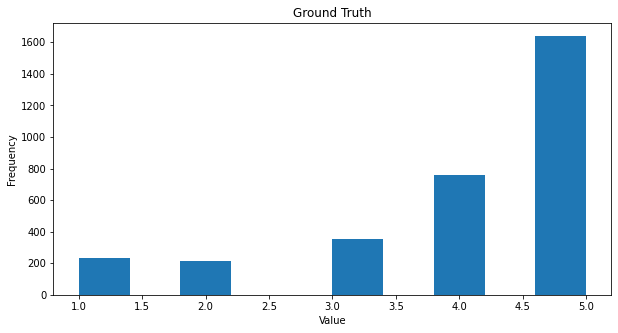

In [ ]:
# Distrubution of ground truth scores for all the hotels
getHistogram(finaldf,'ratingScore', 'Ground Truth')

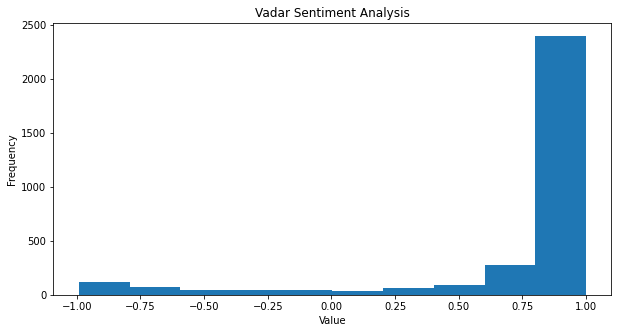

In [ ]:
# Distribution of vader score for all the hotels
getHistogram(finaldf, 'vader', 'Vadar Sentiment Analysis')

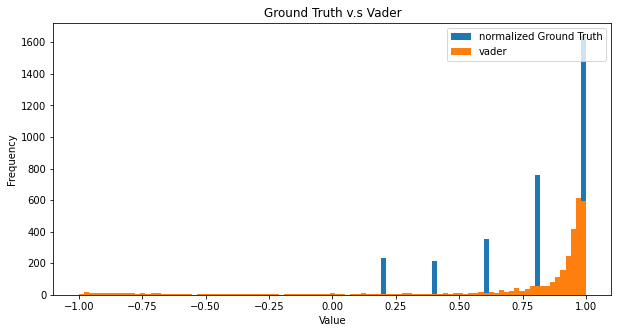

In [ ]:
# Comparing the distrubutions between the ground truth (normalized) and vader for all the hotels
getHistogram(finaldf, 'both', 'Ground Truth v.s Vader')

The ground truth scores are well spread out around 3-5 with a majority being 5 stars but the vader score is very much skewed to the right making it look like all the reviews are positive when alot of them are neutral around 3-4 and not perfect 5. So you can't just look at vader score.

**Q5 (ii) Show a histogram of the number of reviews per hotel. Do you notice any specific trends or are no trends apparent?**

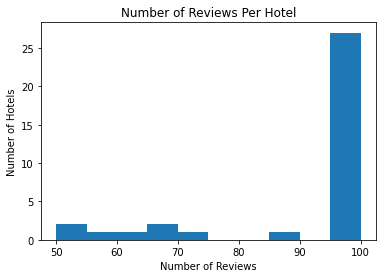

In [ ]:
# Plotting the number of reviews per hotel
plt.hist(hoteldf_mod['hotelName'].value_counts())
plt.title('Number of Reviews Per Hotel')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Hotels')
plt.show()

Most of the hotels have 100 reviews but this is because alot of the hotels having less reviews were removed at the beginning as they only had 1 or 2 reviews. So this graph may not be very accurate. But hotels that are good usually have more reviews than the bad ones. 

**Q5 (b) Boxplots**

**(ii) In two plots, one for ground truth star rating and one for Vader sentiment, show a plot of side-by-side boxplots of these scores for the top-5 ranked hotels according to star rating.**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


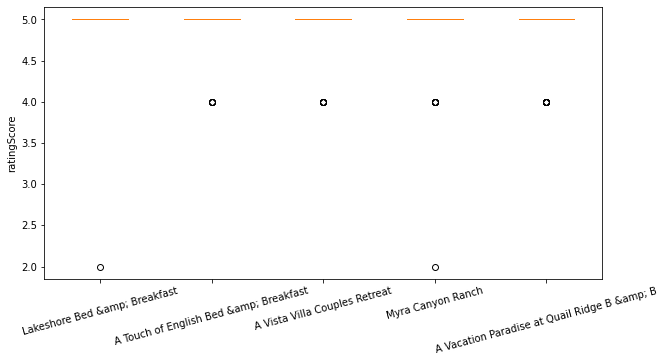

In [ ]:
#Plotting the side-by-side boxplot for top 5 hotels based on ground truth rating
top5_hotel = avg_rating_df.sort_values('AverageRatingScore',ascending=0).head(5)
five_hotels = top5_hotel.index.values

hotel_list_gt = []
for hotel in five_hotels:
  _hotel = finaldf.loc[finaldf['hotelName'] == hotel]['ratingScore']
  hotel_list_gt.append(_hotel)


# multiple box plots on one figure
plt.figure(figsize=(10,5))
plt.boxplot(hotel_list_gt)
plt.xticks(np.arange(1,6), five_hotels,rotation=15)
plt.ylabel('ratingScore')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


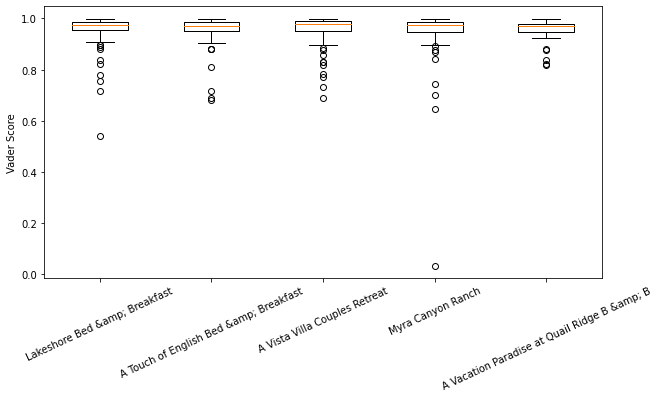

In [ ]:
#Plotting the side-by-side boxplot for the vader score for the top 5 hotels based on ground truth rating
top5_hotel = avg_rating_df.sort_values('AverageRatingScore',ascending=0).head(5)
five_hotels = top5_hotel.index.values

hotel_list_vader = []
for hotel in five_hotels:
  _hotel = finaldf.loc[finaldf['hotelName'] == hotel]['vader']
  hotel_list_vader.append(_hotel)


# multiple box plots on one figure
plt.figure(figsize=(10,5))
plt.boxplot(hotel_list_vader)
plt.xticks(np.arange(1,6), five_hotels,rotation=25)
plt.ylabel('Vader Score')
plt.show()

**Q5 (ii) Report the mean and variance of the ground truth and Vader sentiment scores for the top-5 ranked hotels according to star rating.**

In [ ]:
print('Mean and Variance of the ground truth rating for the Top 5 Hotels based on ground truth rating\n')
i = 0
for hotel in hotel_list_gt:
    print(five_hotels[i], '\nMean', hotel.mean(), 'Variance', hotel.var(),'\n')
    i += 1
    
print('\nMean and Variance of the vader score for the Top 5 Hotels based on ground truth rating\n')
i = 0
for hotel in hotel_list_vader:
    print(five_hotels[i], '\nMean', hotel.mean(), 'Variance', hotel.var(),'\n')
    i += 1


Mean and Variance of the ground truth rating for the Top 5 Hotels based on ground truth rating

Lakeshore Bed &amp; Breakfast 
Mean 4.97 Variance 0.08999999999999975 

A Touch of English Bed &amp; Breakfast 
Mean 4.95 Variance 0.047979797979798 

A Vista Villa Couples Retreat 
Mean 4.94 Variance 0.056969696969696816 

Myra Canyon Ranch 
Mean 4.91 Variance 0.14333333333333395 

A Vacation Paradise at Quail Ridge B &amp; B 
Mean 4.863636363636363 Variance 0.11958041958041941 


Mean and Variance of the vader score for the Top 5 Hotels based on ground truth rating

Lakeshore Bed &amp; Breakfast 
Mean 0.9558749999999995 Variance 0.0041757008838383845 

A Touch of English Bed &amp; Breakfast 
Mean 0.9556029999999999 Variance 0.003029670596969696 

A Vista Villa Couples Retreat 
Mean 0.9574130000000001 Variance 0.003337441142424243 

Myra Canyon Ranch 
Mean 0.9477459999999998 Variance 0.011616763923232316 

A Vacation Paradise at Quail Ridge B &amp; B 
Mean 0.9561348484848486 Variance 0.0014

**Q5 (iii) Which do you find more informative, the boxplots or the mean and variance, or are they equally informative? Why?**


The boxplots are more informative as they tell us about the median, 25th & 75th quartile along with the minimum and maximum values. You can also see if there are any outliers in the dataset.

**Q5 (c) Scatterplots and heatmaps**

**(i) Show both a scatterplot and heatmap of ground truth score (star rating) versus Vader sentiment score. Each review is a point on the scatterplot. Do you notice anything interesting? What does this tell you about star ratings vs. Vader sentiment scores?**


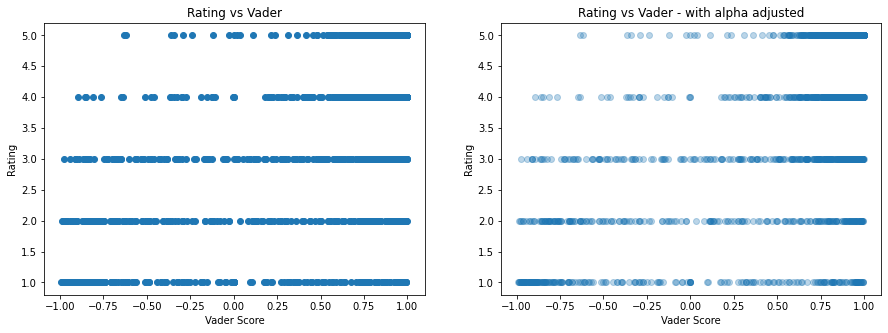

In [ ]:
# Plotting the scatterplot for Groundtruth vs Vader score
fig, ax = plt.subplots(1,2,figsize=(15,5),sharex=False,sharey=False)
rating_scores = finaldf['ratingScore'].values
vader_scores = finaldf['vader'].values
ax[0].plot(vader_scores, rating_scores,"o")
ax[1].plot(vader_scores, rating_scores,"o", alpha=0.3)

ax[0].set_title('Rating vs Vader')
ax[1].set_title('Rating vs Vader - with alpha adjusted')

for _ax in ax:
  _ax.set_ylabel('Rating')
  _ax.set_xlabel('Vader Score')

In [ ]:
# Plotting the heatmap for Groundtruth vs Vader score
k = gaussian_kde(np.vstack([vader_scores, rating_scores]))
xi, yi = np.mgrid[vader_scores.min():vader_scores.max():vader_scores.size**0.5*1j,rating_scores.min():rating_scores.max():rating_scores.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

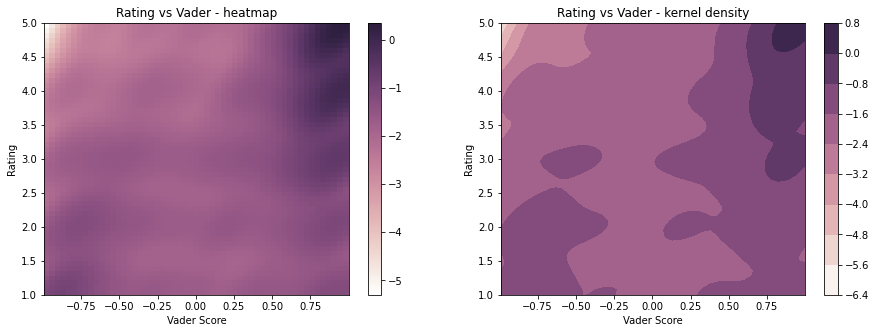

In [ ]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))


b1 = ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
b2 = ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(vader_scores.min(), vader_scores.max())
ax1.set_ylim(rating_scores.min(), rating_scores.max())
ax2.set_xlim(vader_scores.min(), vader_scores.max())
ax2.set_ylim(rating_scores.min(), rating_scores.max())

ax1.set_xlabel('Vader Score')
ax1.set_ylabel('Rating')

ax2.set_xlabel('Vader Score')
ax2.set_ylabel('Rating')

fig.colorbar(b1, ax=ax1)
fig.colorbar(b2, ax=ax2)

ax1.set_title('Rating vs Vader - heatmap')
ax2.set_title('Rating vs Vader - kernel density')
plt.show()

Both the rating and vader score are correlated as it can be seen from the heatmap the top right conner being dark.

**Q5 (ii) Show two scatterplots and two heatmaps of the length of reviews versus each of groundtruth score and Vader sentiment score. Each review is a point on the scatterplot. Provide 2 comments on any trends, or lack of trends you see.**

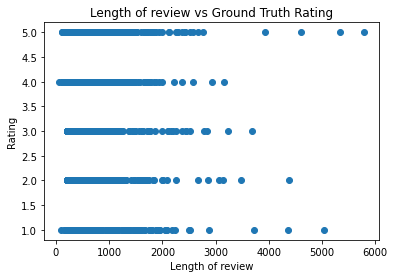

In [ ]:
# Plotting the scatterplot for the length of review vs Ground truth rating
y = finaldf['ratingScore'].values
x = finaldf['reviewColumn'].str.len()
plt.plot(x, y,"o")
plt.ylabel('Rating')
plt.xlabel('Length of review')
plt.title('Length of review vs Ground Truth Rating')
plt.show()

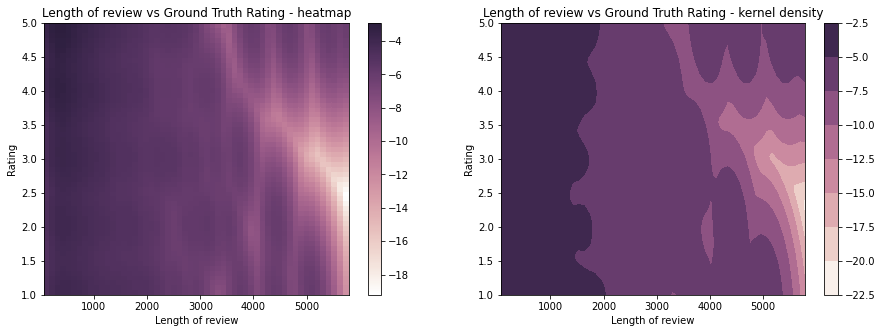

In [ ]:
# Plotting the heatmap for the length of review vs Ground truth rating
k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))


b1 = ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
b2 = ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(x.min(), x.max())
ax1.set_ylim(y.min(), y.max())
ax2.set_xlim(x.min(), x.max())
ax2.set_ylim(y.min(), y.max())

ax1.set_xlabel('Length of review')
ax1.set_ylabel('Rating')

ax2.set_xlabel('Length of review')
ax2.set_ylabel('Rating')

fig.colorbar(b1, ax=ax1)
fig.colorbar(b2, ax=ax2)

ax1.set_title('Length of review vs Ground Truth Rating - heatmap')
ax2.set_title('Length of review vs Ground Truth Rating - kernel density')
plt.show()

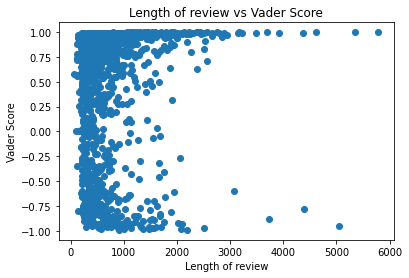

In [ ]:
# Plotting the scatterplot for the length of review vs Vader Score
y = finaldf['vader'].values
x = finaldf['reviewColumn'].str.len()
plt.plot(x, y,"o")
plt.ylabel('Vader Score')
plt.xlabel('Length of review')
plt.title('Length of review vs Vader Score')
plt.show()

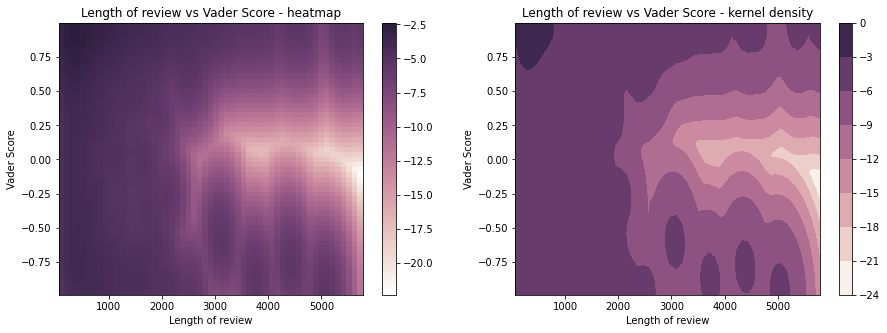

In [ ]:
# Plotting the heatmap for the length of review vs Vader Score 
k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))


b1 = ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
b2 = ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(x.min(), x.max())
ax1.set_ylim(y.min(), y.max())
ax2.set_xlim(x.min(), x.max())
ax2.set_ylim(y.min(), y.max())

ax1.set_xlabel('Length of review')
ax1.set_ylabel('Vader Score')

ax2.set_xlabel('Length of review')
ax2.set_ylabel('Vader Score')

fig.colorbar(b1, ax=ax1)
fig.colorbar(b2, ax=ax2)

ax1.set_title('Length of review vs Vader Score - heatmap')
ax2.set_title('Length of review vs Vader Score - kernel density')
plt.show()

Most of the reviews are shorter but the length of the review doesn't really tell us about the sentiment of the reviews.

**Q5 (iii) Show two scatterplots of the number of reviews per hotel versus each of average ground truth score and average Vader sentiment score. In this case, each hotel is a single point on the scatterplot. Provide 2 comments on any trends, or lack of trends you see.**

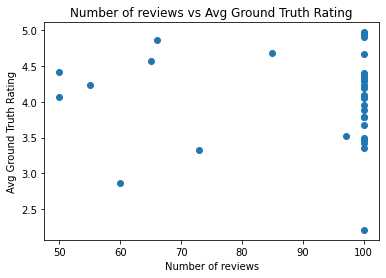

In [ ]:
hotel_avg_gt = pd.merge(avg_rating_df, finaldf.groupby('hotelName').count(), on='hotelName')

y = hotel_avg_gt['AverageRatingScore'].values
x = hotel_avg_gt['reviewColumn'].values
plt.plot(x, y,"o")
plt.ylabel('Avg Ground Truth Rating')
plt.xlabel('Number of reviews')
plt.title('Number of reviews vs Avg Ground Truth Rating')
fig = plt.gcf()

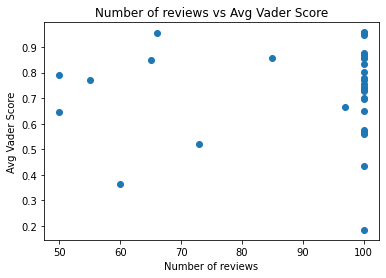

In [ ]:
hotel_avg_gt = pd.merge(avg_rating_df, finaldf.groupby('hotelName').count(), on='hotelName')

y = hotel_avg_gt['AverageVader'].values
x = hotel_avg_gt['reviewColumn'].values
plt.plot(x, y,"o")
plt.ylabel('Avg Vader Score')
plt.xlabel('Number of reviews')
plt.title('Number of reviews vs Avg Vader Score')
fig = plt.gcf()

Hotels with alot of reviews have better overall score this could be because most people would tend to visit the most popular hotels that have only mostly positive reviews. 

People avoid Bad hotels and therefore they have fewer reviews.

**Q5 (d) Temporal analysis**

**Using a sample of 6 hotels (2 highly rated, 2 lowly rated, and 2 mediocre) with a large number of reviews complete the following:**

**(i) Plot the rolling average score as a function of time. Comment on if the highly rated and lowly rated hotels’ ratings were consistent or did they fluctuate?**


In [ ]:
# Displaying the top 5 hotels based on average groundtruth score
top_hotels_rating = avg_rating_df.reset_index(drop=False)\
                               .sort_values('AverageRatingScore',ascending=False)[['hotelName','AverageRatingScore','n_reviews']]

In [ ]:
hotels_samp = []
samples = [0,1,16,17,-2,-1]
for hotel in samples:
  hotels_samp.append(top_hotels_rating['hotelName'].values[hotel])

In [ ]:
hotels_samp

['Lakeshore Bed &amp; Breakfast',
 'A Touch of English Bed &amp; Breakfast',
 'Hotel Zed Kelowna',
 'Samesun Kelowna',
 'Oasis Inn',
 'Lake Okanagan Resort']

In [ ]:
hoteldf_mod.replace('2 weeks ago','March 17, 2022',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


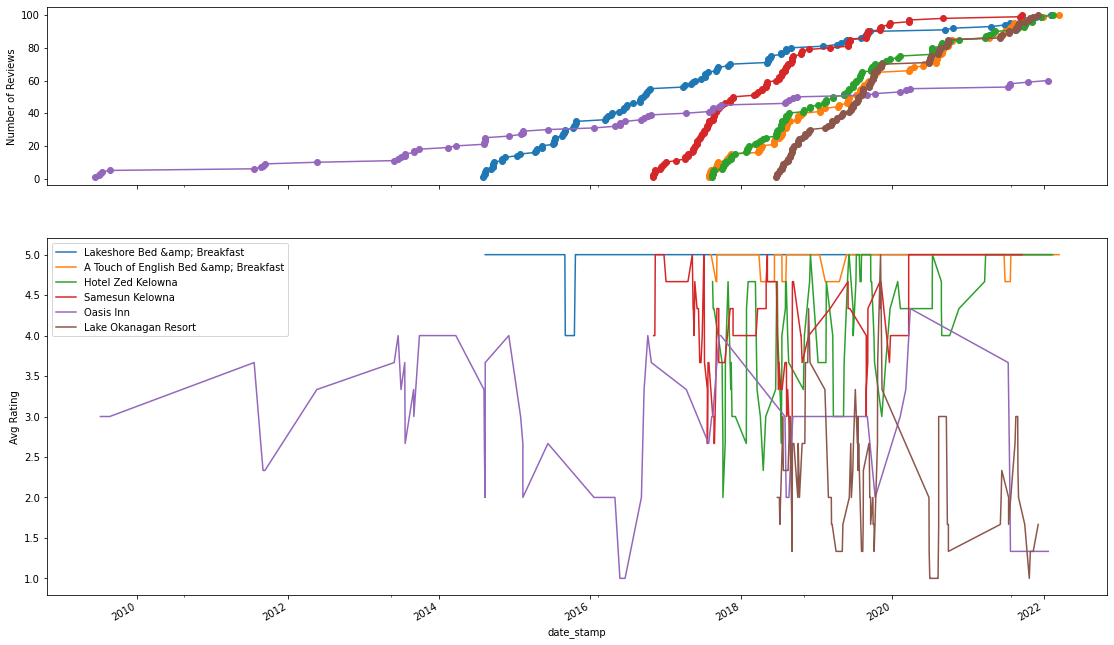

In [ ]:
# It can be useful to see when reviews were being made and how the ratings changed using a running mean
fig, ax = plt.subplots(2, 1, figsize=(19,12),
                       sharex=True,
                       gridspec_kw={
                           'height_ratios': [1, 2]})

for hotel in hotels_samp: 
  _df = hoteldf_mod[hoteldf_mod['hotelName']==hotel].set_index('date_stamp')
  _df.index = pd.to_datetime(_df.index)
  _df = _df.sort_index()
  _df['count'] = 1
  _df['count'].cumsum().plot(ax=ax[0],label=hotel, marker='o')
  _df['ratingScore'].rolling(3).mean().plot(ax=ax[1],label=hotel)

ax[1].set_ylabel('Avg Rating')
ax[0].set_ylabel('Number of Reviews')
plt.legend()
plt.show()

1. The highly rated hotel 'Lakeshore Bed amp; Breakfast' did not fluctuate they have a constant line at 5 star rating with a small dip in the beginning.

2. The lowly rated hotel 'Lake Okanagan Resort' fluctuates the most out of all the other hotels. Hovering between 1.5 and 3 stars.

**Q5 (ii) Determine how you can plot the rate of reviews (i.e., the number of reviews in a fixed time period) for each hotel over time. After showing this plot, comment on the trends you observe and provide a hypothesis to explain these observed trends.**

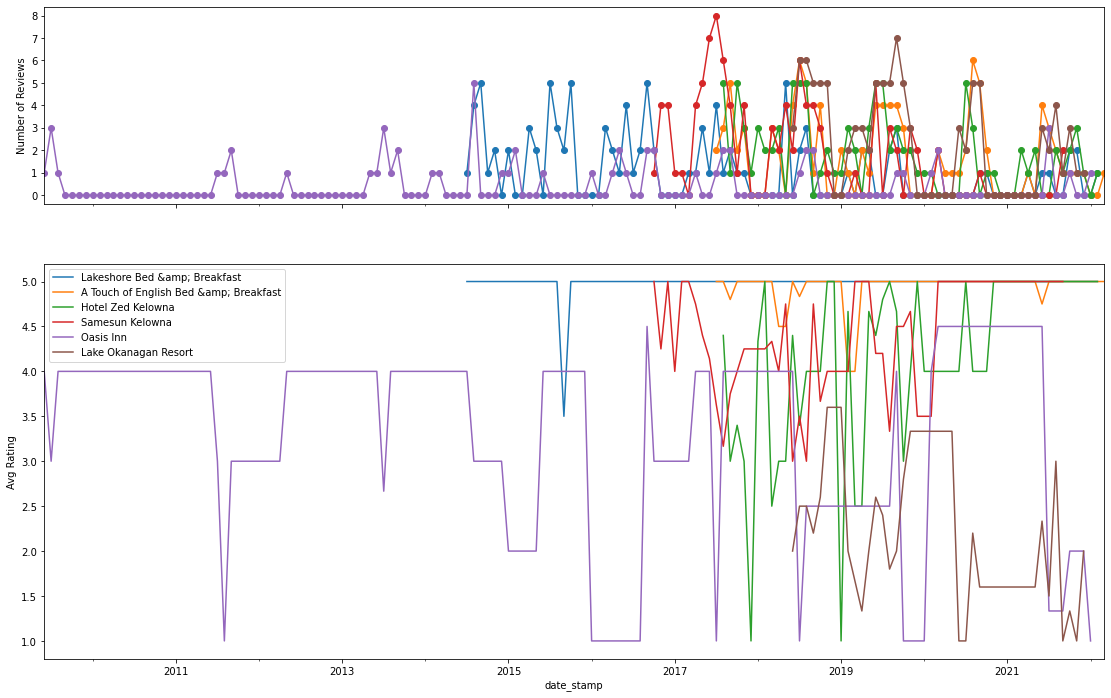

In [ ]:
# It can be useful to see when reviews were being made and how the ratings changed
fig, ax = plt.subplots(2, 1, figsize=(19,12),
                       sharex=True,
                       gridspec_kw={
                           'height_ratios': [1, 2]})

for hotel in hotels_samp: 
  _df = hoteldf_mod[hoteldf_mod['hotelName']==hotel].set_index('date_stamp')
  _df.index = pd.to_datetime(_df.index)
  _df = _df.sort_index()
  _df['count'] = 1
  _df_monthly = _df.groupby(pd.Grouper(freq='M')).agg({'count':'sum','ratingScore':'mean'})
  _df_monthly['ratingScore'] = _df_monthly['ratingScore'].fillna(method='ffill') # hold the last rating constant in months with no reviews
  _df_monthly['count'].plot(ax=ax[0],label=hotel, marker='o')
  _df_monthly['ratingScore'].plot(ax=ax[1],label=hotel)

ax[1].set_ylabel('Avg Rating')
ax[0].set_ylabel('Number of Reviews')
plt.legend()
plt.show()

**From the above time series plot**

1. The two highly rated hotels 'Lakeshore Bed amp; Breakfast' & 'A Touch of English Bed amp; Breakfast' both barely fluctuate and they remain constant around 4.5-5.0 stars.

2. The two lowly rated hotels 'Oasis Inn' & 'Lake Okanagan Resort' fluctuates the most with oasis hovering between 4-1 stars and lake okanagan between 3-1 stars.

The reason for these might be because for a good hotel 90% of people will have a good experience and will always leave a good review and rating hence why its constant and doesn't fluctuate. Whereas, for bad hotels the people are gonna have vastly differing experiences and they will rate it differently some might give 1 star whereas some might only give 2 or 3 as their lowest rating. Therefore it fluctuates a lot. 

In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
pandoc set to manually installed.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa
Suggested packages:
  fonts-noto apache2 | lighttpd | httpd poppler-utils ghostscript
  fonts-japanese-mincho | fonts-ipa

In [ ]:
!jupyter nbconvert --to PDF "assignment_ds.ipynb"

[NbConvertApp] Converting notebook assignment_ds.ipynb to PDF
[NbConvertApp] Support files will be in assignment_ds_files/
[NbConvertApp] Making directory ./assignment_ds_files
[NbConvertApp] Making directory ./assignment_ds_files
[NbConvertApp] Making directory ./assignment_ds_files
[NbConvertApp] Making directory ./assignment_ds_files
[NbConvertApp] Making directory ./assignment_ds_files
[NbConvertApp] Making directory ./assignment_ds_files
[NbConvertApp] Making directory ./assignment_ds_files
[NbConvertApp] Making directory ./assignment_ds_files
[NbConvertApp] Making directory ./assignment_ds_files
[NbConvertApp] Making directory ./assignment_ds_files
[NbConvertApp] Making directory ./assignment_ds_files
[NbConvertApp] Making directory ./assignment_ds_files
[NbConvertApp] Making directory ./assignment_ds_files
[NbConvertApp] Making directory ./assignment_ds_files
[NbConvertApp] Making directory ./assignment_ds_files
[NbConvertApp] Making directory ./assignment_ds_files
[NbConvertApp